In [ ]:
pip install pandas numpy matplotlib seaborn nltk wordcloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK 데이터 다운로드 (처음 한 번만 실행)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /data/ephemeral/home/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /data/ephemeral/home/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
# CSV 파일로 된 텍스트 데이터 로드 (예: 대화와 요약 데이터)
df = pd.read_csv('/data/ephemeral/home/data/data/train_en.csv')

# 데이터프레임의 처음 몇 줄 확인
df.head(5)

,fname,dialogue,summary,topic,dialogue_en,summary_en,topic_en
0,train_1100,"#Person1#: 안녕하십니까, 마틴씨.\n#Person2#: 안녕하세요, 만나서...",고우 씨가 예쁜 꽃과 막걸리 병을 가지고 마틴 부부를 방문했다.,방문하기,"#Person1#: Good afternoon, Mr. Martin.\n#Perso...",Mr. Gow visited Mr. and Mrs. Martin with a pre...,Visit Us
1,train_1101,"#Person1#: 앤드류, 어떻게 지내? \n#Person2#: 별로야. 요즘 꽤...",앤드류는 여자친구에게 외로움을 토로한다. 그는 자신의 친구들이 지인이지만 친구는 아...,새로운 친구 사귀기,"#Person1#: How are you doing, Andrew?\n#Person...",Andrew complains to his girlfriend about his l...,Making New Friends
2,train_1102,"#Person1#: 안녕, 제니. 무슨 일이야? \n#Person2#: 존, 나 지...",제니가 존에게 500위안을 빌리는 것을 요청한다.,돈 빌리기,"#Person1#: Hi, Jenny. What's wrong? \n#Person2...",Jenny asks John to lend her 500 yuan.,Borrow Money
3,train_1103,"#Person1#: 자, 당신에 대해 이야기해주세요.\n#Person2#: 그린 씨...",아이린은 그린 씨에게 영업 부서에서의 직장 경험과 그가 비서로 일하고 싶어하는 이유...,직장 면접,"#Person1#: Well, tell me about yourself.\n#Per...",Irene tells Mr Green about her work experience...,Job Interview
4,train_1104,"#Person1#: 알겠어요, 캐리, 운전할 줄 아세요?\n#Person2#: 네,...","캐리는 대학 가기 전에 운전 면허증을 받았고, 운전 시험에서 좋은 점수를 받았다. ...",운전 면허증,"#Person1#: Okay, Carrie, do you know how to dr...",Carrie got her driver's license before she wen...,Driver's License


# en데이터셋 검증

In [88]:
df[df['dialogue_en'].isna()==True]

,fname,dialogue,summary,topic,dialogue_en,summary_en,topic_en


In [89]:
len(df)

12439

In [90]:
train = pd.read_csv('/data/ephemeral/home/data/data/train.csv')
len(train)

12457

In [82]:
train.head()

,fname,dialogue,summary,topic
0,train_0,"#Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나...","스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니...",건강검진 받기
1,train_1,"#Person1#: 안녕하세요, 파커 부인, 어떻게 지내셨나요?\n#Person2#...",파커 부인이 리키를 데리고 백신 접종을 하러 갔다. 피터스 박사는 기록을 확인한 후...,백신
2,train_2,"#Person1#: 실례합니다, 열쇠 한 묶음 보셨나요?\n#Person2#: 어떤...","#Person1#은 열쇠 한 묶음을 찾고 있고, 그것을 찾기 위해 #Person2#...",열쇠 찾기
3,train_3,#Person1#: 왜 너는 여자친구가 있다는 걸 말해주지 않았어?\n#Person...,#Person1#은 #Person2#가 여자친구가 있고 그녀와 결혼할 것이라는 사실...,여자친구가 있다
4,train_4,"#Person1#: 안녕, 숙녀분들! 오늘 밤 당신들은 정말 멋져 보여. 이 춤을 ...",말릭이 니키에게 춤을 요청한다. 말릭이 발을 밟는 것을 신경 쓰지 않는다면 니키는 ...,댄스


In [71]:
train.tail()

,fname,dialogue,summary,topic
12452,train_12455,#Person1#: 실례합니다. 맨체스터 출신의 그린 씨이신가요?\n#Person2...,탄 링은 흰머리와 수염으로 쉽게 인식되는 그린 씨를 만나 호텔로 데려갈 예정입니다....,누군가를 태우다
12453,train_12456,#Person1#: 이윙 씨가 우리가 컨퍼런스 센터에 오후 4시에 도착해야 한다고 ...,#Person1#과 #Person2#는 이윙 씨가 늦지 않도록 요청했기 때문에 컨퍼...,컨퍼런스 센터
12454,train_12457,#Person1#: 오늘 어떻게 도와드릴까요?\n#Person2#: 차를 빌리고 싶...,#Person2#는 #Person1#의 도움으로 5일 동안 소형 차를 빌립니다.,차 렌트
12455,train_12458,#Person1#: 오늘 좀 행복해 보이지 않아. 무슨 일 있어?\n#Person2...,#Person2#의 엄마가 일자리를 잃었다. #Person2#는 엄마가 우울해하지 ...,실직
12456,train_12459,"#Person1#: 엄마, 다음 토요일에 이 삼촌네 가족을 방문하기 위해 비행기를 ...",#Person1#은 다음 토요일에 이 삼촌네를 방문할 때 가방을 어떻게 싸야 할지 ...,짐 싸기


In [83]:
import pandas as pd

# 예상되는 'fname' 값의 집합 생성
expected_set = {'train_' + str(i) for i in range(12457)}

# 실제 데이터셋에서 'fname' 값의 집합 추출
actual_set = set(train['fname'])

# 누락된 값 확인
missing_values = expected_set - actual_set

# 결과 출력
if missing_values:
    print("누락된 값들:", missing_values)
else:
    print("모든 값이 빠짐없이 있습니다.")


누락된 값들: {'train_11473', 'train_10933', 'train_10972'}


In [81]:
train[train['fname'].isin(['train_11472', 'train_11474', 'train_10932', 'train_10934', 'train_10971','train_10973'])]

,fname,dialogue,summary,topic
10932,train_10932,#Person1#: 저는 워싱턴 회의에 참석할 수 없어요. 당신을 가장 적합한 대리...,#Person1#은 워싱턴 회의에 참석할 수 없어서 대신 제품을 소개하러 가라고 #...,출장
10933,train_10934,"#Person1#: 안녕, 줄리엣, 내가 내일 저녁에 갈프의 리 씨와 그의 팀원들을...",#Person1#은 클라이언트를 저녁 식사에 초대할 장소에 대한 줄리엣의 제안을 요...,레스토랑 초대
10970,train_10971,"#Person1#: 헤이, 맨디. 대학 첫 해는 지금까지 괜찮아?\r\n#Perso...",맨디는 할아버지에게 도전적이지만 그녀를 독립적으로 만드는 대학 생활을 즐기고 있다고...,대학 생활
10971,train_10973,#Person1#: 정말 힘들어요. 제대로 휴식을 취해야 할 것 같아요. 스트레스를...,#Person2#는 스트레스를 해소하기 위해 #Person1#에게 레몬차를 마시고 ...,스트레스 해소
11470,train_11472,"#Person1#: 밥이 얼마 없네요, 그렇죠?\r\n#Person2#: 네, 그렇...",#Person1#은 배가 고프고 밥과 고기를 원합니다. 도널드는 마을까지 걸어가서 ...,먹을 것들
11471,train_11474,"#Person1#: 안녕하세요, 와인 월드에 오신 것을 환영합니다. 필요하신 것이 ...",#Person2#는 상사에게 가져갈 와인 종류에 대한 #Person1#의 추천을 요...,와인 선택


In [80]:
train[train['fname'].isin(['train_11473', 'train_10933', 'train_10972'])]

,fname,dialogue,summary,topic


In [97]:
import pandas as pd

# 예상되는 'fname' 값의 집합 생성
expected_set = {'train_' + str(i) for i in range(12457)}

# 실제 데이터셋에서 'fname' 값의 집합 추출
actual_set = set(df['fname'])

# 누락된 값 확인
missing_values = expected_set - actual_set

# 결과 출력
if missing_values:
    print("누락된 값들:", missing_values)
else:
    print("모든 값이 빠짐없이 있습니다.")


누락된 값들: {'train_11473', 'train_10933', 'train_10972'}


In [92]:
df[df['fname'].isin(['train_11472', 'train_11474', 'train_10932', 'train_10934', 'train_10971','train_10973'])]

,fname,dialogue,summary,topic,dialogue_en,summary_en,topic_en
6609,train_11472,"#Person1#: 밥이 얼마 없네요, 그렇죠?#Person2#: 네, 그렇습니다,...",#Person1#은 배가 고프고 밥과 고기를 원합니다. 도널드는 마을까지 걸어가서 ...,먹을 것들,"#Person1#: There's not much rice, is there?#Pe...",#Person1# is hungry and wants rice and meat. D...,Things to Eat
6610,train_11474,"#Person1#: 안녕하세요, 와인 월드에 오신 것을 환영합니다. 필요하신 것이 ...",#Person2#는 상사에게 가져갈 와인 종류에 대한 #Person1#의 추천을 요...,와인 선택,"#Person1#: Hello, welcome to Wine World. If yo...",#Person2# asks #Person1# for a recommendation ...,Wine Selection
9471,train_10932,#Person1#: 저는 워싱턴 회의에 참석할 수 없어요. 당신을 가장 적합한 대리...,#Person1#은 워싱턴 회의에 참석할 수 없어서 대신 제품을 소개하러 가라고 #...,출장,#Person1#: I can't make the Washington meeting...,"#Person1# can't attend the Washington meeting,...",Outbound
9472,train_10934,"#Person1#: 안녕, 줄리엣, 내가 내일 저녁에 갈프의 리 씨와 그의 팀원들을...",#Person1#은 클라이언트를 저녁 식사에 초대할 장소에 대한 줄리엣의 제안을 요...,레스토랑 초대,"#Person1#: Hi, Juliet, I'm going to invite Mr....",#Person1# asks for Juliet's suggestion on wher...,Restaurant Invitation
9509,train_10971,"#Person1#: 헤이, 맨디. 대학 첫 해는 지금까지 괜찮아?#Person2#:...",맨디는 할아버지에게 도전적이지만 그녀를 독립적으로 만드는 대학 생활을 즐기고 있다고...,대학 생활,"#Person1#: Hey, Mandy. Is your first year of c...","Mandy says she is enjoying college life, which...",College Life
9510,train_10973,#Person1#: 정말 힘들어요. 제대로 휴식을 취해야 할 것 같아요. 스트레스를...,#Person2#는 스트레스를 해소하기 위해 #Person1#에게 레몬차를 마시고 ...,스트레스 해소,#Person1#: I'm really stressed out. I think I ...,#Person2# suggests #Person1# to drink lemon te...,Stress relief


In [ ]:
import pandas as pd

# 데이터 로드
train_en = pd.read_csv(r'/data/ephemeral/home/data/data/train_en.csv')
batch_7 = pd.read_excel(r'/data/ephemeral/home/data/data/batch_7.xlsx')
batch_9 = pd.read_excel(r'/data/ephemeral/home/data/data/batch_9.xlsx')

# 누락된 fname 집합
missing_values = {'train_646', 'train_644', 'train_832', 'train_834', 'train_641', 'train_642', 
                  'train_645', 'train_831', 'train_833', 'train_838', 'train_647', 'train_643', 
                  'train_648', 'train_837', 'train_839', 'train_835', 'train_649', 'train_836'}

# batch_7과 batch_9에서 누락된 fname 추출 및 추가
missing_from_batch_7 = batch_7[batch_7['fname'].isin(missing_values)]
missing_from_batch_9 = batch_9[batch_9['fname'].isin(missing_values)]
train_en = pd.concat([train_en, missing_from_batch_7, missing_from_batch_9], ignore_index=True)

# 데이터 정렬
train_en.sort_values('fname', inplace=True)

# 데이터 저장
train_en.to_csv('train_en_final.csv', index=False)


In [103]:
df = pd.read_csv(r'/data/ephemeral/home/data/data/train_en.csv')

In [104]:
len(df)

12457

# 마스킹 패턴 찾기

In [105]:
import re
import pandas as pd

def reg_masking(text):
    pattern = r"#\w+#"  # #로 둘러싸인 단어들을 찾는 정규식 패턴
    masked = re.findall(pattern, text)
    return set(masked)  # 중복을 제거하고 고유한 토큰들의 집합을 반환

# `reg_masking`을 호출하고 결과를 문자열로 변환하여 저장
df['masked_patterns'] = df['dialogue_en'].apply(lambda x: str(reg_masking(x)))

# 문자열로 저장된 집합을 실제 집합(set)으로 변환
df['masked_patterns'] = df['masked_patterns'].apply(eval)

# 모든 행에 있는 세트들의 합집합을 구함
all_unique_tokens = set.union(*df['masked_patterns'])

print("고유한 특수 토큰들:", all_unique_tokens)


고유한 특수 토큰들: {'#Email#', '#Person6#', '#Person5#', '#Person1#', '#Person3#', '#Person4#', '#CardNumber#', '#Person#', '#Address#', '#PhoneNumber#', '#SSN#', '#Person7#', '#Person2#', '#DateOfBirth#', '#CarNumber#', '#PassportNumber#'}


In [125]:
df.head()

,fname,dialogue,summary,topic,dialogue_en,summary_en,topic_en,masked_patterns,cleaned_dialogue,cleaned_summary,dialogue_turns,number_of_speakers,cleaned_dialogue2,text_length,summary_length
0,train_0,"#Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나요?\n#Person2#: 건강검진을 받는 것이 좋을 것 같아서요.\n#Person1#: 그렇군요, 당신은 5년 동안 건강검진을 받지 않았습니다. 매년 받아야 합니다.\n#Person2#: 알고 있습니다. 하지만 아무 문제가 없다면 왜 의사를 만나러 가야 하나요?\n#Person1#: 심각한 질병을 피하는 가장 좋은 방법은 이를 조기에 발견하는 것입니다. 그러니 당신의 건강을 위해 최소한 매년 한 번은 오세요.\n#Person2#: 알겠습니다.\n#Person1#: 여기 보세요. 당신의 눈과 귀는 괜찮아 보입니다. 깊게 숨을 들이쉬세요. 스미스씨, 담배 피우시나요?\n#Person2#: 네.\n#Person1#: 당신도 알다시피, 담배는 폐암과 심장병의 주요 원인입니다. 정말로 끊으셔야 합니다. \n#Person2#: 수백 번 시도했지만, 습관을 버리는 것이 어렵습니다.\n#Person1#: 우리는 도움이 될 수 있는 수업과 약물들을 제공하고 있습니다. 나가기 전에 더 많은 정보를 드리겠습니다.\n#Person2#: 알겠습니다, 감사합니다, 의사선생님.","스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니다. 호킨스 의사는 스미스씨가 담배를 끊는 데 도움이 될 수 있는 수업과 약물에 대한 정보를 제공할 것입니다.",건강검진 받기,"#Person1#: Hello, Mr. Smith. I'm Dr. Hawkins. Why are you here today?\n#Person2#: I thought it would be a good idea to have a checkup.\n#Person1#: I see, you haven't had one in five years. You should have one every year.\n#Person2#: I know. But if nothing is wrong, why should I go to see a doctor?\n#Person1#: The best way to avoid serious illness is to catch these early. So for your own good, come at least once a year.\n#Person2#: I see.\n#Person1#: Look here. Your eyes and ears seem fine. Take a deep breath. Do you smoke, Mr. Smith?\n#Person2#: Yes.\n#Person1#: As you know, smoking is the leading cause of lung cancer and heart disease. You really should quit.\n#Person2#: I've tried hundreds of times, but I find it hard to break the habit.\n#Person1#: We have classes and medications that can help. I'll give you more information before you leave.\n#Person2#: OK, thank you, doctor.","Mr. Smith is having a physical exam, and Dr. Hawkins recommends that he have a physical exam every year. Dr. Hawkins will give Mr. Smith information about classes and medications that can help him quit smoking.",Get a health check,"{#Person2#, #Person1#}","Hello, Mr. Smith. I'm Dr. Hawkins. Why are you here today?\n I thought it would be a good idea to have a checkup.\n I see, you haven't had one in five years. You should have one every year.\n I know. But if nothing is wrong, why should I go to see a doctor?\n The best way to avoid serious illness is to catch these early. So for your own good, come at least once a year.\n I see.\n Look here. Your eyes and ears seem fine. Take a deep breath. Do you smoke, Mr. Smith?\n Yes.\n As you know, smoking is the leading cause of lung cancer and heart disease. You really should quit.\n I've tried hundreds of times, but I find it hard to break the habit.\n We have classes and medications that can help. I'll give you more information before you leave.\n OK, thank you, doctor.","Mr. Smith is having a physical exam, and Dr. Hawkins recommends that he have a physical exam every year. Dr. Hawkins will give Mr. Smith information about classes and medications that can help him quit smoking.",12,2,"Hello, Mr. Smith. I'm Dr. Hawkins. Why are you here today? I thought it would be a good idea to have a checkup. I see, you haven't had one in five years. You should have one every year. I know. But if nothing is wrong, why should I go to see a doctor? The best way to avoid serious illness is to catch these early. So for your own good, come at least once a year. I see. Look here. Your eyes and ears seem fine. Take a deep breath. Do you smoke, Mr. Smith? Yes. As you know, smoking is the leading cause of lung cancer and heart disease. You really should quit. I've tried hundreds of times, but I find it hard to break the habit. We have classes and medications that can help. I'll give you more information before you leave. OK, thank you, doctor.",750,210
1,train_1,"#Person1#: 안녕하세요, 파커 부인, 어떻게 지내셨나요?\n#Person2#: 안녕하세요, 피터스 박사님. 잘 지냈습니다, 감사합니다. 리키와 함께 백신 접종을 위해 왔습니다.\n#Person1#: 좋습니다. 백신 접종 기록을 보니, 리키는 이미 소아마비, 디프테리아, B형 간염 백신을 맞았군요. 그는 14개월

# dialogue, summary 길이

In [126]:
import re
import pandas as pd

# 제거할 특수 토큰 리스트
special_tokens_all = ['#CarNumber#', '#SSN#', '#Person4#:', '#Person7#:', '#PhoneNumber#', '#Person3#:', '#PassportNumber#', '#Email#', '#Person2#:', '#Person#:', '#Person6#:', '#CardNumber#', '#Address#', '#Person5#:', '#DateOfBirth#', '#Person1#:']
special_tokens_n = ['\n']
special_tokens = ['\n', '#CarNumber#', '#SSN#', '#PhoneNumber#', '#PassportNumber#', '#Email#','#CardNumber#', '#Address#','#DateOfBirth#', ':']
speaker_tokens = ['#Person1#:', '#Person2#:', '#Person3#:', '#Person4#:', '#Person5#:', '#Person6#:', '#Person7#:']

# 특수 토큰을 제거하는 함수 정의
def remove_special_tokens(text):
    for token in special_tokens:
        text = text.replace(token, '')  # 특수 토큰을 빈 문자열로 대체
    return text

# 대화의 turn 수를 세는 함수
def count_dialogue_turns(text):
    # 화자 태그 패턴을 정의합니다 (예: #Person1#, #Person2# 등)
    speaker_pattern = r"#Person\d+#"
    
    # 모든 화자 태그를 찾아 리스트로 반환합니다
    speakers = re.findall(speaker_pattern, text)
    
    # 화자가 변경될 때마다 턴을 카운트합니다
    turn_count = 0
    current_speaker = None
    
    for speaker in speakers:
        if speaker != current_speaker:
            turn_count += 1
            current_speaker = speaker
            
    return turn_count

# '\n'을 제거하는 함수 정의
def remove_special_tokens_n(text):
    for token in special_tokens_n:
        text = text.replace(token, '')  # 특수 토큰을 빈 문자열로 대체
    return text

#  제거하는 함수 정의
def remove_speaker_tokens(text):
    for token in speaker_tokens:
        text = text.replace(token, '')  # 특수 토큰을 빈 문자열로 대체
    return text

def count_speakers(text):
    # 화자 식별자에 대한 정규식 패턴 생성
    pattern = r'(' + '|'.join(re.escape(token) for token in speaker_tokens) + ')'
    # 텍스트에서 패턴에 매칭되는 모든 항목을 찾아 집합으로 변환
    speakers = set(re.findall(pattern, text))
    # 집합의 크기(고유 화자 수) 반환
    return len(speakers)

# 대화 및 요약에서 특수 토큰을 제거한 텍스트 생성
df['cleaned_dialogue'] = df['dialogue_en'].apply(remove_special_tokens_n)
df['cleaned_summary'] = df['summary_en'].apply(remove_special_tokens_n)

# 대화의 turn 수 계산
df['dialogue_turns'] = df['dialogue_en'].apply(count_dialogue_turns)
df['number_of_speakers'] = df['dialogue_en'].apply(count_speakers)

# 텍스트 길이 계산
df['cleaned_dialogue2'] = df['cleaned_dialogue'].apply(remove_speaker_tokens)
df['text_length'] = df['cleaned_dialogue2'].apply(len)
df['summary_length'] = df['cleaned_summary'].apply(len)

# 텍스트 길이 및 turn 수, 화자 수 통계 출력
print(df[['dialogue_turns', 'number_of_speakers','text_length', 'summary_length']].describe())


       dialogue_turns  number_of_speakers   text_length  summary_length
count    12457.000000        12457.000000  12457.000000    12457.000000
mean         9.477804            2.011640    619.318616      142.571807
std          4.145516            0.131476    351.873411       66.088693
min          1.000000            1.000000    123.000000       25.000000
25%          7.000000            2.000000    383.000000       96.000000
50%          9.000000            2.000000    540.000000      131.000000
75%         12.000000            2.000000    779.000000      176.000000
max         61.000000            7.000000   4071.000000      960.000000


In [127]:
pd.set_option('display.max_colwidth', None)
df[df['fname']=='train_9995']['dialogue_en']

12452    #Person1#: Excuse me, waiter, can I have some wine before the main course? #Person2#: Have you decided which wine you want? #Person1#: I don't know yet. Can you recommend one? #Person2#: I recommend white wine. It will help to stimulate your appetite. #Person1#: Okay, then I'll have a bottle of that.
Name: dialogue_en, dtype: object

In [128]:
df.iloc[0]

fname                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      train_0
dialogue                                                                             

In [129]:
df.iloc[0]['dialogue_en']

"#Person1#: Hello, Mr. Smith. I'm Dr. Hawkins. Why are you here today?\n#Person2#: I thought it would be a good idea to have a checkup.\n#Person1#: I see, you haven't had one in five years. You should have one every year.\n#Person2#: I know. But if nothing is wrong, why should I go to see a doctor?\n#Person1#: The best way to avoid serious illness is to catch these early. So for your own good, come at least once a year.\n#Person2#: I see.\n#Person1#: Look here. Your eyes and ears seem fine. Take a deep breath. Do you smoke, Mr. Smith?\n#Person2#: Yes.\n#Person1#: As you know, smoking is the leading cause of lung cancer and heart disease. You really should quit.\n#Person2#: I've tried hundreds of times, but I find it hard to break the habit.\n#Person1#: We have classes and medications that can help. I'll give you more information before you leave.\n#Person2#: OK, thank you, doctor."

In [130]:
df.iloc[1]['summary_en']

'Mrs. Parker took Ricky to Dr. Peters for a vaccination. Dr. Peters checked the records and then gave Ricky the vaccination.'

In [131]:
df[['dialogue_turns', 'number_of_speakers','text_length', 'summary_length']].describe()

,dialogue_turns,number_of_speakers,text_length,summary_length
count,12457.000000,12457.000000,12457.000000,12457.000000
mean,9.477804,2.011640,619.318616,142.571807
std,4.145516,0.131476,351.873411,66.088693
min,1.000000,1.000000,123.000000,25.000000
25%,7.000000,2.000000,383.000000,96.000000
50%,9.000000,2.000000,540.000000,131.000000
75%,12.000000,2.000000,779.000000,176.000000
max,61.000000,7.000000,4071.000000,960.000000


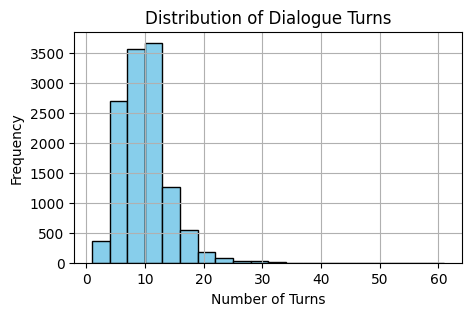

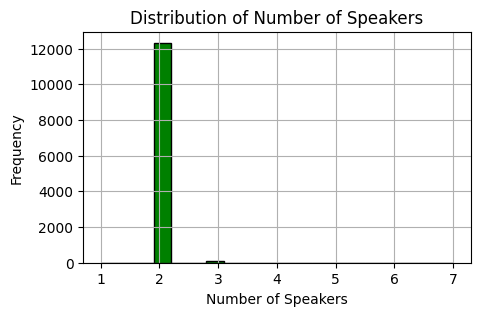

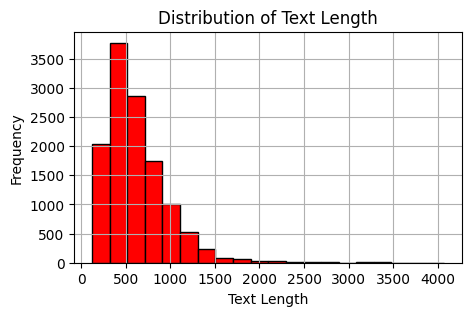

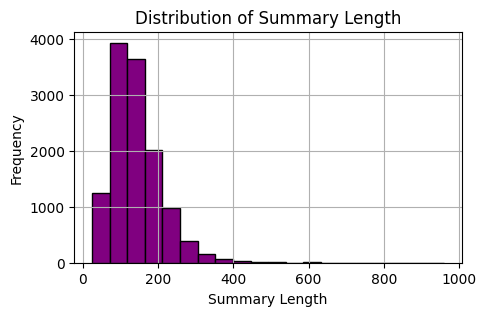

In [132]:
import matplotlib.pyplot as plt

# 'dialogue_turns'의 히스토그램
plt.figure(figsize=(5, 3))
plt.hist(df['dialogue_turns'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Dialogue Turns')
plt.xlabel('Number of Turns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 'number_of_speakers'의 히스토그램
plt.figure(figsize=(5, 3))
plt.hist(df['number_of_speakers'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Number of Speakers')
plt.xlabel('Number of Speakers')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 'text_length'의 히스토그램
plt.figure(figsize=(5, 3))
plt.hist(df['text_length'], bins=20, color='red', edgecolor='black')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 'summary_length'의 히스토그램
plt.figure(figsize=(5, 3))
plt.hist(df['summary_length'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Summary Length')
plt.xlabel('Summary Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# 각 챗마다 텍스트 길이 : summary 길이의 비율은?
결론: summary의 길이는 text의 길이에 크게 비례하며, turn과의 상관관게를 갖는다

In [134]:
df['ratio'] = df['summary_length']/df['text_length'] 

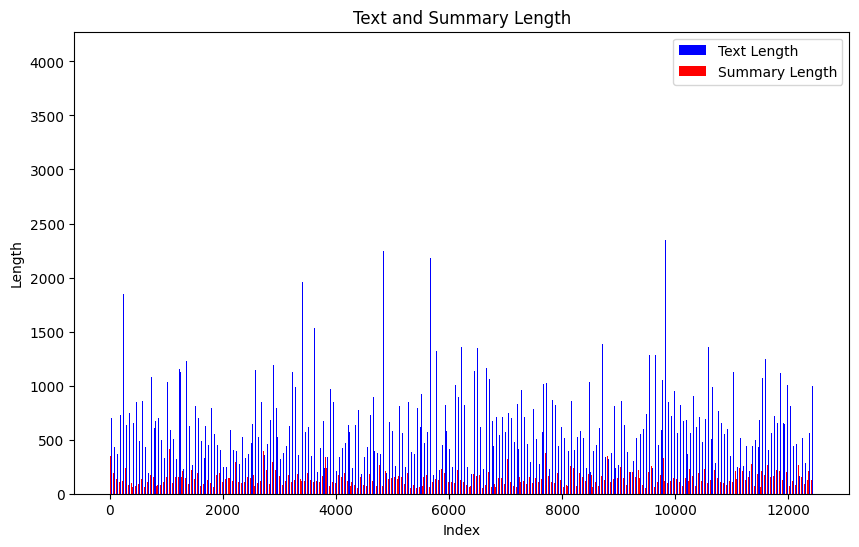

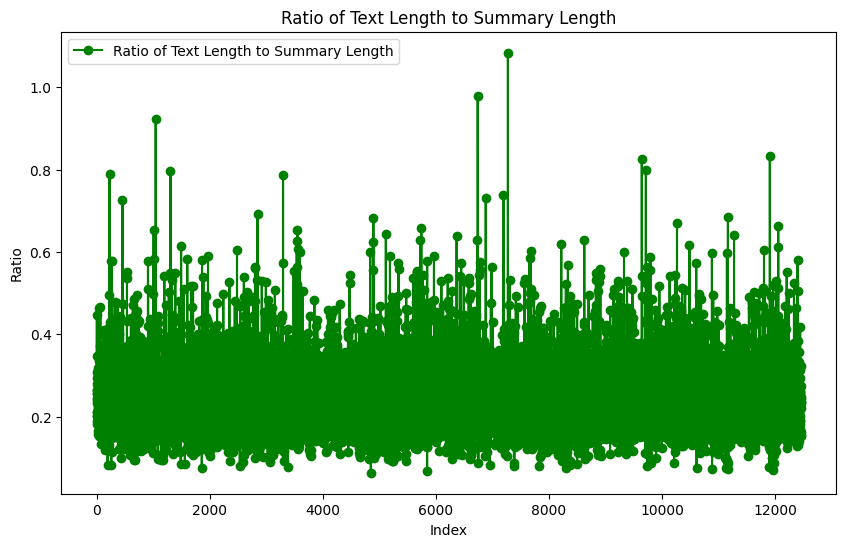

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# 첫 번째 그래프: text_length와 summary_length 막대 그래프
fig, ax1 = plt.subplots(figsize=(10, 6))
width = 0.35  # 막대 너비
indices = df.index  # 인덱스 배열

ax1.bar(indices - width/2, df['text_length'], width, label='Text Length', color='b')
ax1.bar(indices + width/2, df['summary_length'], width, label='Summary Length', color='r')
ax1.set_xlabel('Index')
ax1.set_ylabel('Length')
ax1.set_title('Text and Summary Length')
ax1.legend()

plt.show()

# 두 번째 그래프: ratio 꺾은선 그래프
fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(indices, df['ratio'], 'g-o', label='Ratio of Text Length to Summary Length')
ax2.set_xlabel('Index')
ax2.set_ylabel('Ratio')
ax2.set_title('Ratio of Text Length to Summary Length')
ax2.legend()

plt.show()

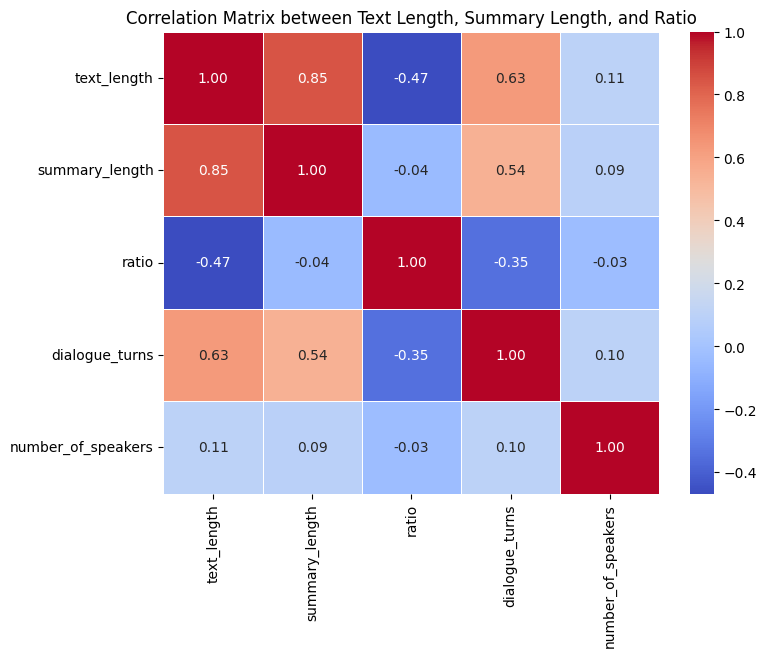

In [144]:
import pandas as pd

# 상관 계수 계산
correlation_matrix = df[['text_length', 'summary_length', 'ratio', 'dialogue_turns','number_of_speakers']].corr()

# 상관 계수 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix between Text Length, Summary Length, and Ratio')
plt.show()
